<a href="https://colab.research.google.com/github/Izaiah-M/ML-AI-Projects/blob/main/Handwriting_Recognition_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition with K-Means: Project Overview

This project demonstrates how to use K-Means clustering, an unsupervised machine learning algorithm, to recognize handwritten digits from the scikit-learn digits dataset.

## What We're Doing

1. **Loading the Dataset**: We use scikit-learn's built-in digits dataset, which contains 8x8 pixel images of handwritten digits (0-9).

2. **Clustering with K-Means**: We apply K-Means clustering to group similar digit images together without using their labels. We set up 10 clusters, hoping they'll naturally correspond to the 10 digits.

3. **Visualizing Cluster Centers**: We visualize what the algorithm has learned by displaying the 10 cluster centers as images. These represent the "average" or "prototype" of each digit class according to the model.

4. **Making Predictions**: We use the trained model to classify new handwritten digit samples by finding which cluster center they're closest to.

5. **Mapping Clusters to Digits**: Since K-Means doesn't know which cluster corresponds to which digit, we manually create a mapping based on the visual appearance of the cluster centers.

## Why It's Interesting

This project showcases the power of unsupervised learning - even though K-Means has no access to the digit labels during training, it naturally discovers the structure in the data that corresponds to different digits. This demonstrates how machines can find meaningful patterns in data without explicit guidance.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

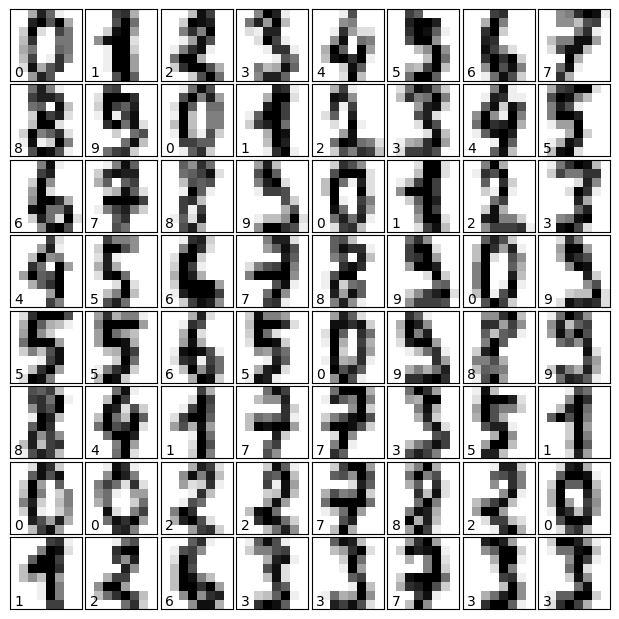

In [4]:
# Load the digits dataset
digits = datasets.load_digits()

# Figure size (width, height)
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()

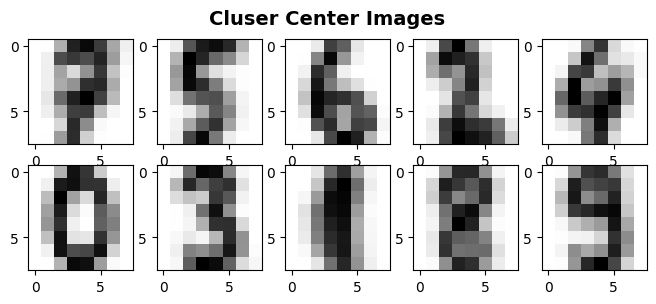

In [5]:
model = KMeans(n_clusters=10, random_state=42)

model.fit(digits.data)

fig = plt.figure(figsize=(8, 3))

fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()

In [6]:
new_samples = np.array([
[0.00,2.82,6.79,7.62,7.62,5.64,0.00,0.00,0.00,4.88,5.72,2.82,3.89,7.62,2.14,0.00,0.00,0.00,0.00,0.00,0.15,7.17,3.81,0.00,0.00,0.00,0.00,0.23,3.44,7.47,3.59,0.00,0.00,1.91,6.02,7.32,7.62,6.64,2.21,0.54,0.00,5.72,7.62,7.62,7.62,7.62,7.62,7.55,0.00,1.30,1.75,1.52,1.52,1.52,1.91,1.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.07,2.29,1.30,0.00,0.00,0.00,0.00,3.81,7.55,7.62,7.40,2.75,0.00,0.00,2.14,7.63,5.11,1.30,6.48,5.26,0.00,0.00,4.58,6.79,0.15,0.00,5.41,5.34,0.00,0.00,4.58,6.63,0.00,0.30,7.17,4.58,0.00,0.00,2.75,7.62,5.80,5.49,7.63,1.53,0.00,0.00,0.00,3.36,5.87,6.10,3.59,0.00,0.00],
[0.00,0.00,0.15,2.98,4.58,3.51,0.00,0.00,0.00,1.91,6.71,7.62,7.32,7.40,0.15,0.00,0.00,5.80,6.63,1.91,4.35,7.62,1.45,0.00,0.00,6.86,6.10,3.28,6.86,7.62,3.20,0.00,0.00,3.74,6.94,7.62,6.41,7.17,4.65,0.00,0.00,0.00,0.00,0.00,0.00,5.49,5.80,0.00,0.00,0.00,0.00,0.00,0.00,4.27,6.86,0.00,0.00,0.00,0.00,0.00,0.00,2.06,4.20,0.00],
[0.00,0.00,3.28,5.72,6.10,4.42,0.15,0.00,0.31,5.64,7.62,5.95,5.11,7.62,2.14,0.00,3.58,7.55,3.05,0.00,0.84,7.62,2.29,0.00,0.61,1.53,0.00,0.61,5.87,7.63,1.76,0.00,0.00,0.00,0.46,6.03,7.32,2.59,0.00,0.00,0.00,1.07,6.25,7.62,6.25,4.42,3.20,0.61,0.00,4.19,7.63,6.79,6.10,6.71,7.63,3.43,0.00,0.15,0.38,0.00,0.00,0.00,0.46,0.08]
])

new_labels = model.predict(new_samples)

In [7]:
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

0830